# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Create Dataset of Four Classes

In [ ]:
np.random.seed(42)
points_per_class = 500

# Generate clusters
class_0 = np.random.randn(points_per_class, 2) + np.array([0, 0])
class_1 = np.random.randn(points_per_class, 2) + np.array([5, 0])
class_2 = np.random.randn(points_per_class, 2) + np.array([0, 5])
class_3 = np.random.randn(points_per_class, 2) + np.array([5, 5])

X = np.vstack((class_0, class_1, class_2, class_3))

Y_raw = np.array([0]*points_per_class + [1]*points_per_class + [2]*points_per_class + [3]*points_per_class)

Y = np.zeros((Y_raw.size, 4))
Y[np.arange(Y_raw.size), Y_raw] = 1



# Visulize the data on Scatter Plot

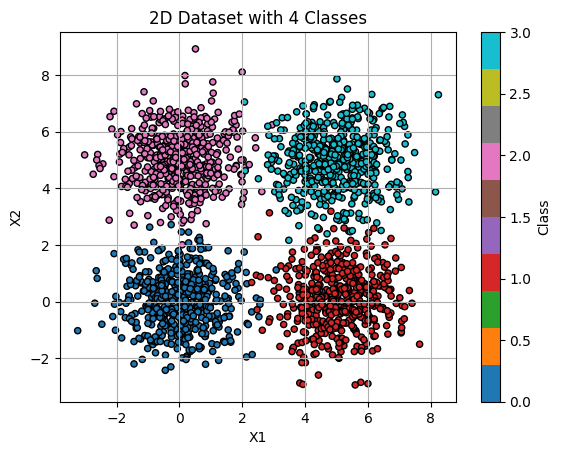

In [ ]:
if len(Y.shape) > 1:
    Y_plot= np.argmax(Y, axis=1)

# Plot the dataset with distinct colors for each class
plt.scatter(X[:, 0], X[:, 1], c=Y_plot, cmap='tab10', edgecolor='k', s=20)
plt.title("2D Dataset with 4 Classes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.colorbar(label="Class")
plt.show()



# Create Four hidden layer and Total Five Layer Neural Network

In [4]:
class NeuralNetwork_fiveLayer(object):
    def __init__(self, hidden1, hidden2, hidden3, hidden4):
        inputLayerNeurons = 2
        outLayerNeurons = 4
        self.learning_rate = 0.2
        
        self.W1 = np.random.randn(inputLayerNeurons, hidden1)
        self.W2 = np.random.randn(hidden1, hidden2)
        self.W3 = np.random.randn(hidden2, hidden3)
        self.W4 = np.random.randn(hidden3, hidden4)  
        self.W5 = np.random.randn(hidden4, outLayerNeurons)  
        
    def sigmoid(self, x, der=False): 
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W1)
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2)
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3)
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4)  
        self.A4 = self.sigmoid(self.Z4)

        self.Z5 = np.dot(self.A4, self.W5)  
        self.pred = self.sigmoid(self.Z5)

        return self.pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        delta5 = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        error4 = delta5.dot(self.W5.T)
        delta4 = self.learning_rate * error4 * self.sigmoid(self.A4, der=True)

        error3 = delta4.dot(self.W4.T)
        delta3 = self.learning_rate * error3 * self.sigmoid(self.A3, der=True)

        error2 = delta3.dot(self.W3.T)
        delta2 = self.learning_rate * error2 * self.sigmoid(self.A2, der=True)

        error1 = delta2.dot(self.W2.T)
        delta1 = self.learning_rate * error1 * self.sigmoid(self.A1, der=True)

        self.W5 += self.A4.T.dot(delta5)
        self.W4 += self.A3.T.dot(delta4)
        self.W3 += self.A2.T.dot(delta3)
        self.W2 += self.A1.T.dot(delta2)
        self.W1 += X.T.dot(delta1)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def accuracy(self, X, Y):
        predictions = self.feedForward(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)
        return np.mean(predicted_classes == true_classes)
    def confusion_matrix(self, X, Y):
        predictions = self.feedForward(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)

        num_classes = Y.shape[1]
        conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

        for true, pred in zip(true_classes, predicted_classes):
            conf_matrix[true, pred] += 1

        return conf_matrix


In [5]:
hidden1 = 10
hidden2 = 8
hidden3 = 6
hidden4 = 6  

NN = NeuralNetwork_fiveLayer(hidden1, hidden2,hidden3,hidden4)

err = []
acc = []

for i in range(200):
    NN.train(X, Y)
    error = np.mean(np.square(Y - NN.feedForward(X)))
    err.append(error)
    
    accuracy = NN.accuracy(X, Y)
    acc.append(accuracy)


conf_matrix = NN.confusion_matrix(X, Y)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[492   5   3   0]
 [  1 493   0   6]
 [  3   0 495   2]
 [  0   5   3 492]]


# Plot the confusion matrix

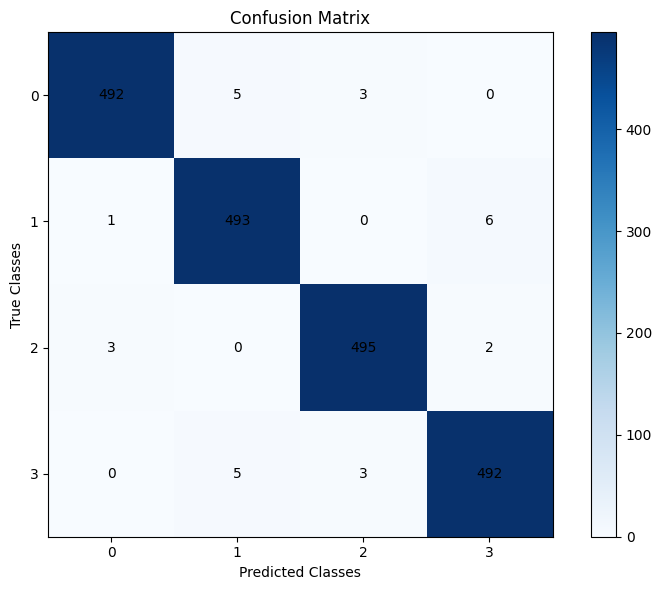

In [6]:

conf_matrix = NN.confusion_matrix(X, Y)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(conf_matrix.shape[1]), labels=range(conf_matrix.shape[1]))
plt.yticks(ticks=range(conf_matrix.shape[0]), labels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

# Plot Accuracy and Losses

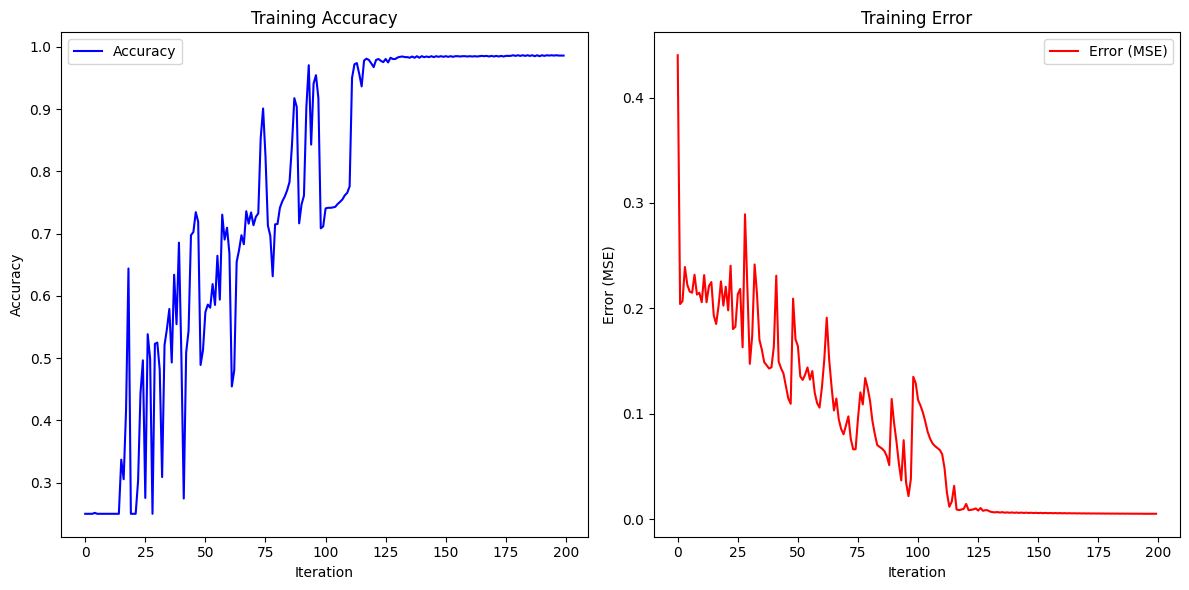

In [7]:
# Plotting error and accuracy in subplots
plt.figure(figsize=(12, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Error subplot
plt.subplot(1, 2, 2)
plt.plot(err, label='Error (MSE)', color='red')
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
plt.title('Training Error')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



In [8]:

np.random.seed(24)  
test_points_per_class = 100  

# Generate test clusters
test_class_0 = np.random.randn(test_points_per_class, 2) + np.array([0, 0])
test_class_1 = np.random.randn(test_points_per_class, 2) + np.array([5, 0])
test_class_2 = np.random.randn(test_points_per_class, 2) + np.array([0, 5])
test_class_3 = np.random.randn(test_points_per_class, 2) + np.array([5, 5])

# Combine test data and labels
X_test = np.vstack((test_class_0, test_class_1, test_class_2, test_class_3))
Y_test_raw = np.array([0]*test_points_per_class + [1]*test_points_per_class +
                      [2]*test_points_per_class + [3]*test_points_per_class)

# One-hot encode the test labels
Y_test = np.zeros((Y_test_raw.size, 4))
Y_test[np.arange(Y_test_raw.size), Y_test_raw] = 1
test_accuracy = NN.accuracy(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix_test = NN.confusion_matrix(X_test, Y_test)
print("Confusion Matrix (Test):")
print(conf_matrix_test)


Test Accuracy: 0.9975
Confusion Matrix (Test):
[[100   0   0   0]
 [  0 100   0   0]
 [  0   0  99   1]
 [  0   0   0 100]]


---
---
# Test Result Discussion

- **Test Accuracy:** 0.9975
- **Confusion Matrix (Test):**
---
---


# Confusion matrix for Test Data

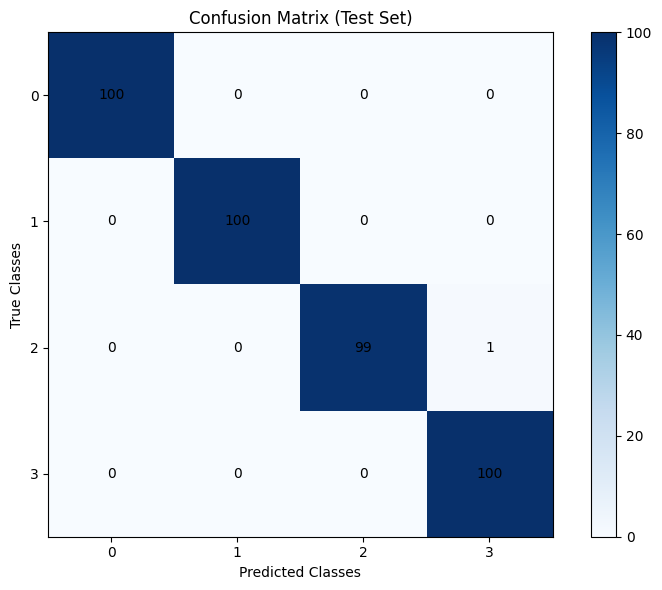

In [9]:

conf_matrix = NN.confusion_matrix(X_test, Y_test)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(conf_matrix.shape[1]), labels=range(conf_matrix.shape[1]))
plt.yticks(ticks=range(conf_matrix.shape[0]), labels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix (Test Set)')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


---
---
---
# **Key Observations from test result:**
- The model achieved an exceptionally high test accuracy of 99.75%.
- **Class 0, 1, and 3**: Perfect classification with no misclassifications (100% accuracy).
- **Class 2**: 99 instances were correctly classified, with only 1 misclassified as class 3.

- **Conclusion:**
- The model performs excellently on the test set, with minimal errors, especially in classes 0, 1, and 3.
- The slight misclassification in class 2 suggests potential areas for improvement, but the overall performance is outstanding.
---
---
---



---
---
# Conclusion 

#### Key Findings:
- **Strong Performance:** Most instances were correctly classified with minimal misclassifications.
- **Class Accuracy:** High accuracy across classes, with only a few misclassifications, often between closely related classes.
- **Training Convergence:** After approximately 125 epochs, the loss became constant, indicating that the model had effectively trained and converged. Accuracy was approximately 100%.

#### Challenges and Lessons Learned:
- **Class Imbalance:** Slight misclassifications suggest room for improvement in handling certain classes.
- **Overfitting:** Balancing complexity and data to prevent overfitting.
- **Data Quality:** Clean, well-preprocessed data is crucial.

#### Potential Improvements:
1. **Architecture:** Experiment with different layers, neurons, and activation functions (e.g., ReLU).
2. **Regularization:** Use dropout, L2 regularization, and early stopping.
3. **Hyperparameter Tuning:** Optimize learning rate, batch size, and training iterations.
4. **Further Experiments:** Use cross-validation and advanced optimizers like Adam or RMSprop.

In summary, the model performed well, converging with nearly 100% accuracy after 125 epochs. Further improvements can be made through architectural tuning and handling class imbalances.
---